In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,r2_score
)

In [2]:
#read in the dataset
dataset =pd.read_csv('Train_data.csv')


In [3]:
#showing the first ten rows
dataset.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [4]:
dataset.tail(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7150,H4637,2014,1.000000,0,V,V,V,U,NaN,2,1962.0,.,NaN,0
7151,H48,2014,0.030137,0,V,V,V,U,NaN,1,1970.0,.,NaN,0
7152,H5016,2012,1.000000,0,V,V,V,U,NaN,2,2001.0,.,NaN,1
7153,H5078,2013,1.000000,1,V,V,V,U,NaN,2,1950.0,.,NaN,0
7154,H5142,2012,1.000000,0,V,V,V,U,NaN,1,2001.0,.,NaN,1
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [5]:
#checking the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [6]:
#checking for missing value
dataset.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [7]:
#checking the shape
dataset.shape

(7160, 14)

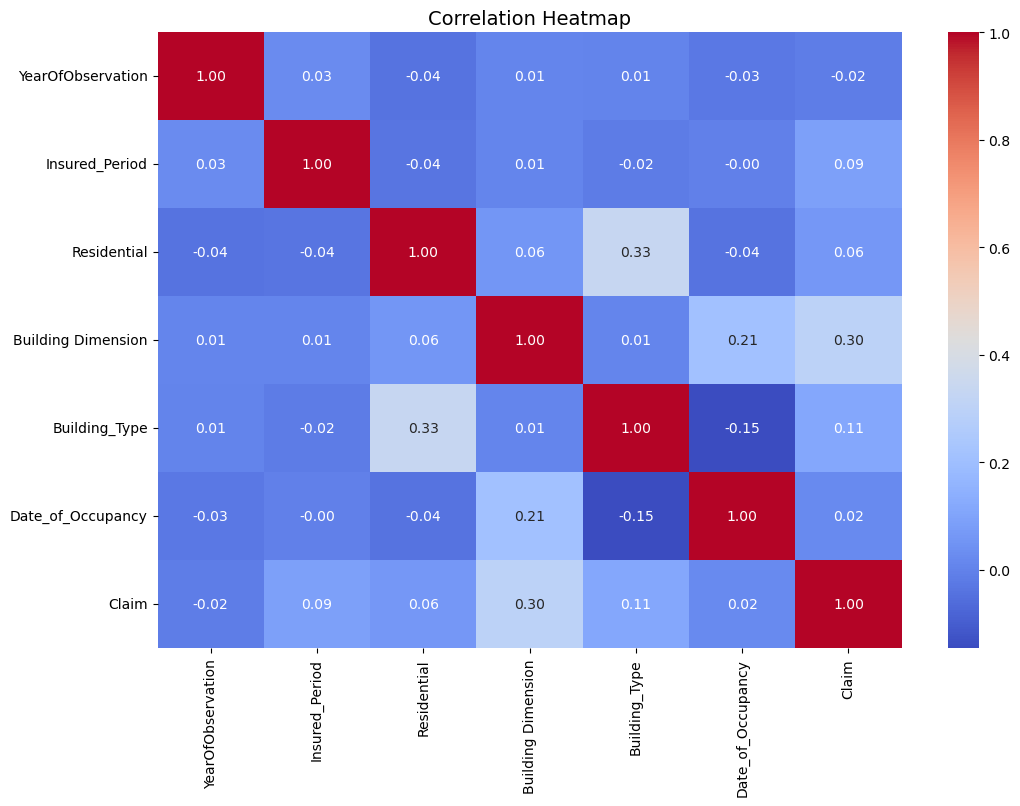

In [8]:
# CORRELATION ANALYSIS USING HEATMAP
numerical_cols = dataset.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [9]:
#checking correlations table
numerical_cols = dataset.select_dtypes(include=['int64','float64']).columns
dataset[numerical_cols].corr()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1.000000,0.025434,-0.040391,0.009128,0.005490,-0.029492,-0.016367
Insured_Period,0.025434,1.000000,-0.037620,0.007473,-0.017811,-0.003445,0.088715
Residential,-0.040391,-0.037620,1.000000,0.057481,0.334039,-0.042058,0.063509
Building Dimension,0.009128,0.007473,0.057481,1.000000,0.007935,0.207624,0.297089
Building_Type,0.005490,-0.017811,0.334039,0.007935,1.000000,-0.146608,0.112168
Date_of_Occupancy,-0.029492,-0.003445,-0.042058,0.207624,-0.146608,1.000000,0.019170
Claim,-0.016367,0.088715,0.063509,0.297089,0.112168,0.019170,1.000000


Text(0.5, 1.0, 'Claim Distribution')

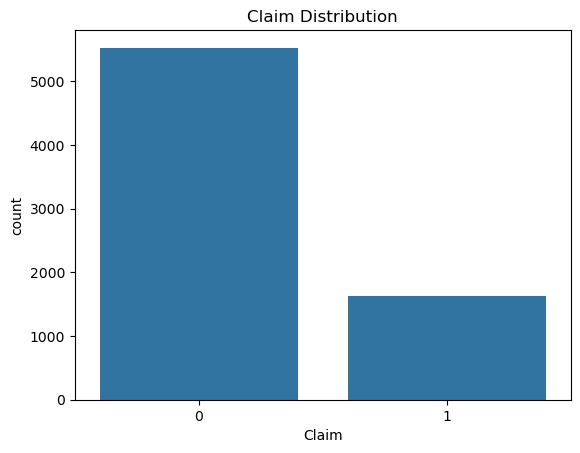

In [10]:
# claim countplot
sns.countplot(x="Claim", data=dataset)
plt.title("Claim Distribution")

In [16]:
#handling missing data
dataset.fillna({"Building Dimension":dataset["Building Dimension"].mean(),"Date_of_Occupancy":dataset["Date_of_Occupancy"].mean(),"Geo_Code":dataset["Geo_Code"].mode()[0],"Garden":dataset["Garden"].mode()[0]}, inplace=True) 

# Confirm all missing values are handled
print("\nRemaining Missing Values:\n", dataset.isna().sum())


Remaining Missing Values:
 Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


In [19]:
#define features and target and drop id colums
x = dataset.drop(columns=['Claim'] + ['Customer Id'], axis =1)
y= dataset['Claim']

In [20]:
#Identify categorical and numerical columns

label_encoder= LabelEncoder()
scaler= StandardScaler()

cat_cols = x.select_dtypes(include=['object']).copy()
num_cols = x.select_dtypes(exclude=['object']).copy()


for col in cat_cols.columns:
    cat_cols[col] = label_encoder.fit_transform(cat_cols[col].astype(str))


num_cols[num_cols.columns] = scaler.fit_transform(num_cols)


x = pd.concat([cat_cols, num_cols], axis=1)



In [21]:
#split into test and train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

log_reg= LogisticRegression()
log_reg.fit(x,y)

D:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#predict
y_pred_lr = log_reg.predict(X_test)

In [23]:
#Evalute
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion_matrix:", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.7828212290502793
Precision: 0.5689655172413793
Recall: 0.10344827586206896
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1113
           1       0.57      0.10      0.18       319

    accuracy                           0.78      1432
   macro avg       0.68      0.54      0.53      1432
weighted avg       0.74      0.78      0.72      1432

Confusion_matrix: [[1088   25]
 [ 286   33]]


In [24]:
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5  # Limiting depth to prevent overfitting
)

In [25]:
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [26]:
y_pred = dt_classifier.predict(X_test)

In [27]:
#Evalute
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion_matrix:", confusion_matrix(y_test, y_pred))

Decision Tree Classifier:
Accuracy: 0.7751396648044693
Precision: 0.4782608695652174
Recall: 0.10344827586206896
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1113
           1       0.48      0.10      0.17       319

    accuracy                           0.78      1432
   macro avg       0.63      0.54      0.52      1432
weighted avg       0.72      0.78      0.71      1432

Confusion_matrix: [[1077   36]
 [ 286   33]]
